<a href="https://colab.research.google.com/github/masoudshahrian/Deep-learning-code/blob/main/Face_Inpainting_using_CNN_with_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title Definition of Libreries

import os
import cv2
import glob
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# @title CNN Components

PATH="/content/drive/MyDrive/Imagetest"

input_folder = PATH #'path_to_your_image_folder'

# Width , Height
IMG_WIDTH = 128
IMG_HEIGHT = 128

# List for Saving Images
X = []
y = []

# Import Images from Dataset
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path).resize((IMG_WIDTH, IMG_HEIGHT))

        # Calculate middle of image
        width, height = img.size
        mid_height = height // 2

        # Cutting Images
        upper_half = img.crop((0, 0, width, mid_height))
        lower_half = img.crop((0, mid_height, width, height))

        # Image to Array
        X.append(np.array(upper_half))
        y.append(np.array(lower_half))

# Normalization
X = np.array(X) / 255.0  # نرمال‌سازی تصاویر
y = np.array(y) / 255.0  # نرمال‌سازی تصاویر

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CNN
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_uniform',
                        input_shape=(mid_height, IMG_WIDTH, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.2))

# model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform'))
model.add(layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform'))
model.add(layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='elu'))
model.add(layers.Dense(mid_height * IMG_WIDTH * 3, activation='sigmoid'))
model.add(layers.Reshape((mid_height, IMG_WIDTH, 3)))

model.compile(optimizer='adam', loss='mean_squared_error')





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# @title Training Model


model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.1)

Epoch 1/250
121/121 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - loss: 0.0546 - val_loss: 0.0392
Epoch 2/250
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0369 - val_loss: 0.0338
Epoch 3/250
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0331 - val_loss: 0.0304
Epoch 4/250
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0289 - val_loss: 0.0286
Epoch 5/250
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0255 - val_loss: 0.0273
Epoch 6/250
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0235 - val_loss: 0.0245
Epoch 7/250
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0209 - val_loss: 0.0235
Epoch 8/250
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0198 - val_loss: 0.0227
Epoch 9/250
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0186 - val_loss: 0.0223
Epoch 10/250
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0174 - val_loss: 0.0220
Epoch 11/250
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0169 - val_loss: 0.0216
Epoch 12/250
121/121 ━━━━━━━━

In [5]:
# @title Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 126, 32)         │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 124, 32)         │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 58, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 9, 25, 128)          │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 12, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 12, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6144)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         786,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24576)               │       3,170,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 64, 128, 3)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,731,618 (48.57 MB)

 Trainable params: 4,243,872 (16.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,487,746 (32.38 MB)

In [6]:
# @title Evaluate Model ارزیابی مدل
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0196
Test Loss: 0.01979587785899639


In [7]:
# @title Save Model
upper_half= X_train
lower_half= y_train
# ذخیره مدل
model.save('CNN_model.h5')

134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


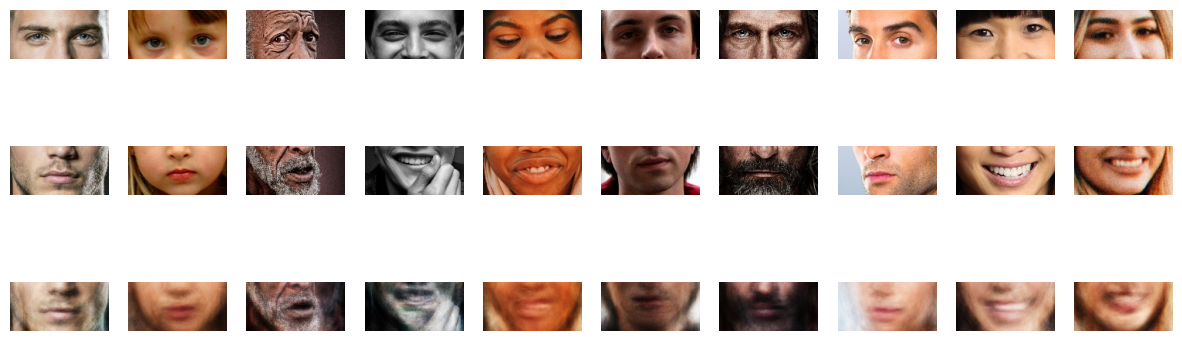

In [8]:
# @title Showing All results

# Showing results
def display_results(model, upper_half, lower_half):
    predictions = model.predict(upper_half)
    fig, axes = plt.subplots(3, 10, figsize=(15, 5))
    for i in range(10):
        axes[0, i].imshow(upper_half[i])
        axes[0, i].axis('off')
        axes[1, i].imshow(lower_half[i])
        axes[1, i].axis('off')
        axes[2, i].imshow(predictions[i])
        axes[2, i].axis('off')
    plt.show()

display_results(model, upper_half, lower_half)

In [9]:
# @title Adding Specific Image
def load_and_preprocess_image(image_path, img_size=(128, 128)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    return img
def split_image(img):
    h, w, _ = img.shape
    upper_half = img[:h//2, :]
    return upper_half

def combine_and_display(upper_half, lower_half_pred):
    full_face = np.vstack((upper_half, lower_half_pred))
    plt.imshow(full_face)
    plt.axis('off')
    plt.show()


'''-----------------------------------------------------------------------------'''
# Load Model of Images
loaded_model = tf.keras.models.load_model('CNN_model.h5')
# CNN_model
'''-----------------------------------------------------------------------------'''

# Path to the new image
image_path ="/content/1 (122).png"
# "/content/resized_image.jpg" #"/content/test1.png" #"/content/resized_image.jpg"# "/path/to/new/image.jpg"  # مسیر تصویر جدید

# Load and preprocess the new image
new_image = load_and_preprocess_image(image_path)
upper_half = split_image(new_image)
'''-----------------------------------------------------------------------------'''

# Normalize the upper half
upper_half_normalized = upper_half / 255.0

# Predict the lower half using the model
upper_half_normalized = np.expand_dims(upper_half_normalized, axis=0)  # Add batch dimension


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


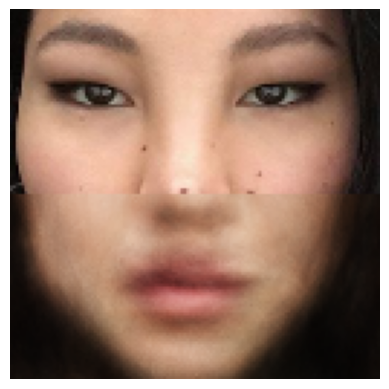

In [10]:
# @title Merge Upper And Lower Part of Specific Image
lower_half_pred = loaded_model.predict(upper_half_normalized)[0]
result_image=lower_half_pred

result_image = (result_image * 255).astype(np.uint8)
result_image = np.concatenate((upper_half, result_image), axis=0)
# result_image = Image.fromarray(result_image)
plt.imshow(result_image)
plt.axis('off')
plt.show()



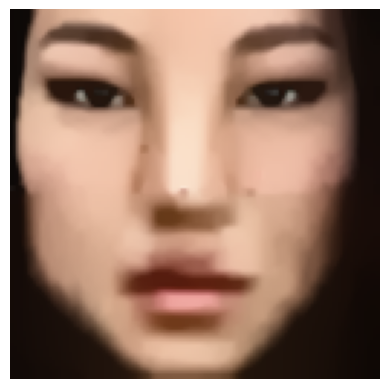

In [11]:
# @title Final Result

import cv2
import numpy as np
image=result_image
image = cv2.GaussianBlur(image, (5, 5), 0)
image = cv2.detailEnhance(image, sigma_s=10, sigma_r=0.15)
image = cv2.edgePreservingFilter(image, flags=1, sigma_s=60, sigma_r=0.4)
plt.imshow(image)
plt.axis('off')
plt.show()
